In [2]:
import sys; sys.path.append("..")
from trader.strategies.vol_trend import vol_trend
from trader.strategies.breakout import breakout
from trader.strategies.cp_trend import cp_trend

from trader.backtest.pnl import PnL
from trader.data.binance import Binance
import pandas as pd
import numpy as np
#from pypfopt.efficient_frontier import EfficientFrontier
#from pypfopt import objective_functions
import seaborn as sns; sns.set_style("whitegrid")

In [3]:
b = Binance(test=False)

In [4]:
b.client.get_orderbook_ticker(symbol="BTCUSDT")

{'symbol': 'BTCUSDT',
 'bidPrice': '21652.84000000',
 'bidQty': '0.01552000',
 'askPrice': '21652.86000000',
 'askQty': '0.04224000'}

In [5]:
pd.read_csv("daily.csv").pivot(index="CloseTime", columns = "Symbol", values="Close").columns

Index(['AAVEUSDT', 'ADAUSDT', 'ALGOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BCHUSDT',
       'BTCUSDT', 'COMPUSDT', 'DOGEUSDT', 'ETHUSDT', 'FILUSDT', 'LINKUSDT',
       'LTCUSDT', 'MANAUSDT', 'MATICUSDT', 'SHIBUSDT', 'SOLUSDT', 'SUSHIUSDT',
       'UNIUSDT', 'XLMUSDT', 'XRPUSDT', 'YFIUSDT'],
      dtype='object', name='Symbol')

In [6]:
bars = b.get_bars(['AAVEUSDT', 'ADAUSDT', 'ALGOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BCHUSDT',
       'BTCUSDT', 'COMPUSDT', 'DOGEUSDT', 'ETHUSDT', 'FILUSDT', 'LINKUSDT',
       'LTCUSDT', 'MANAUSDT', 'MATICUSDT', 'SHIBUSDT', 'SOLUSDT', 'SUSHIUSDT',
       'UNIUSDT', 'XLMUSDT', 'XRPUSDT', 'YFIUSDT'], pd.to_datetime("2018-01-01"), pd.to_datetime("today").floor("D"), "1d", "SPOT")
#bars = pd.read_csv("daily.csv")
# print(bars.Symbol.unique())
# bars = bars[(bars.Symbol == "ETHUSDT") & (bars.CloseTime >= "2019-01-01")]
# prices = bars.set_index("CloseTime").Close
# volumes = bars.set_index("CloseTime").QuoteVolume

In [7]:
bars.to_csv("daily.csv", index=False)

In [8]:
pd.read_csv("daily.csv")

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteVolume,NumTrades,TakerBaseVolume,TakerQuoteVolue,Return,Symbol
0,2020-10-15,51.430,59.000,42.747,42.999,98648.87000,2020-10-16,4.650961e+06,19170,51212.94500,2.418096e+06,NaN,AAVEUSDT
1,2020-10-16,43.017,43.800,39.092,39.461,90836.41200,2020-10-17,3.794719e+06,14644,40523.13400,1.690832e+06,-0.082281,AAVEUSDT
2,2020-10-17,39.371,43.235,38.206,41.365,41971.14300,2020-10-18,1.722979e+06,10050,21967.79000,9.023292e+05,0.048250,AAVEUSDT
3,2020-10-18,41.359,41.425,39.428,40.750,30917.95300,2020-10-19,1.244574e+06,6070,14637.55900,5.896183e+05,-0.014868,AAVEUSDT
4,2020-10-19,40.820,41.000,35.912,35.980,86475.93600,2020-10-20,3.302380e+06,13310,31405.95300,1.205259e+06,-0.117055,AAVEUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,2022-09-07,8620.000,9605.000,8472.000,9328.000,809.13256,2022-09-08,7.327907e+06,22056,413.37059,3.738610e+06,0.082386,YFIUSDT
23687,2022-09-08,9334.000,9550.000,9000.000,9264.000,563.73632,2022-09-09,5.237690e+06,19976,272.08504,2.532235e+06,-0.006861,YFIUSDT
23688,2022-09-09,9265.000,11380.000,9241.000,10465.000,2332.81048,2022-09-10,2.448457e+07,79692,1154.19571,1.209809e+07,0.129642,YFIUSDT
23689,2022-09-10,10441.000,10565.000,10121.000,10438.000,655.38212,2022-09-11,6.775864e+06,23762,348.24108,3.603098e+06,-0.002580,YFIUSDT


In [9]:
sig = cp_trend(prices)

NameError: name 'prices' is not defined

In [ ]:
pp = PnL(sig, prices)

In [ ]:
pp.pnl.cumsum().plot()

In [15]:
pp.position = pd.Series(1, index=pp.position.index)

<AxesSubplot:xlabel='CloseTime'>

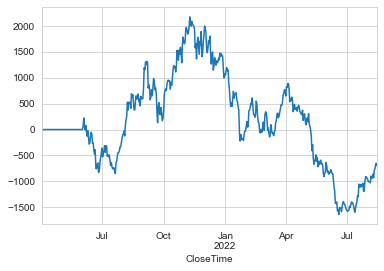

In [17]:
new = pp.get_pnl()
new.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

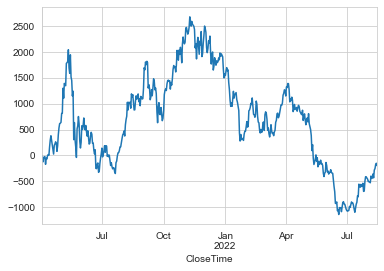

In [19]:
(prices - prices.iloc[0]).plot()

In [48]:
breaks = breakout(prices, lookback=30)#.plot(kind="hist", bins=100)

<AxesSubplot:xlabel='CloseTime'>

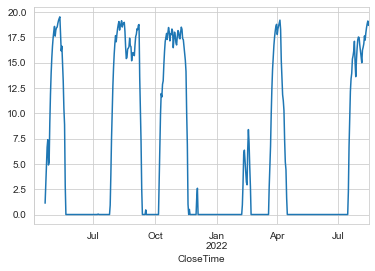

In [49]:
breaks.plot()

<AxesSubplot:xlabel='CloseTime'>

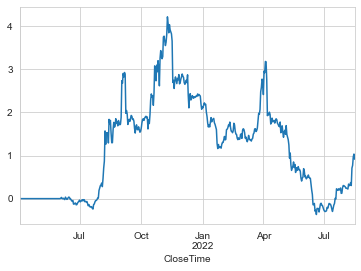

In [50]:
wow = PnL(cp_trend(prices), prices)
wow.pnl.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

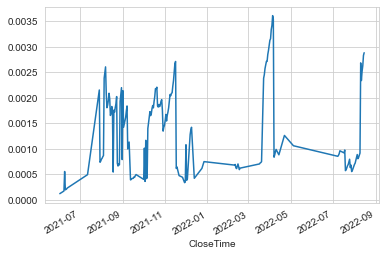

In [51]:
wow.get_position().plot()

<AxesSubplot:xlabel='CloseTime'>

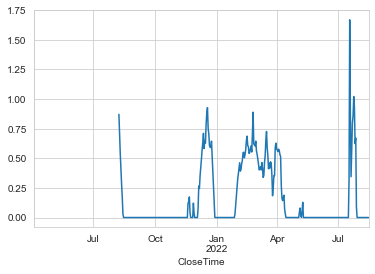

In [52]:
vt = vol_trend(prices, volumes, 32, 128)
vt.plot()

<AxesSubplot:xlabel='CloseTime'>

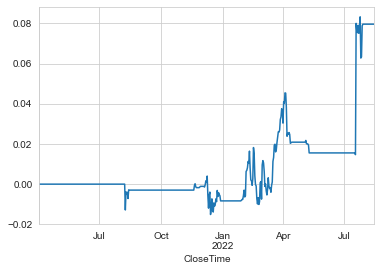

In [53]:
PnL(vt, prices).pnl.cumsum().plot()

In [85]:
aa = PnL(vt, prices)
aa.positions = pd.Series(1, index=aa.positions)

AttributeError: 'PnL' object has no attribute 'positions'

<AxesSubplot:xlabel='CloseTime'>

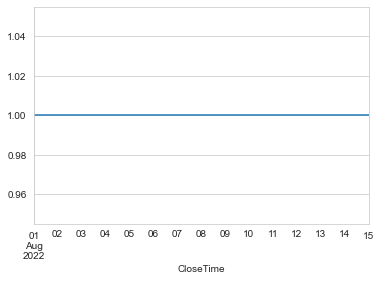

In [54]:
(1.0 + PnL(vt, prices).pct_returns.last("1M")).cumprod().plot()

<AxesSubplot:xlabel='CloseTime'>

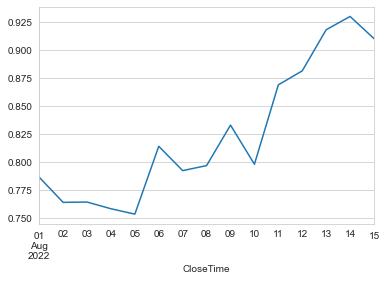

In [55]:
(prices / prices.iloc[0]).last("1M").plot()

In [56]:
df = {}
sigs = {}
pct = {}
for l in [16, 32, 64, 128, 256]:
    s = l // 4
    best = vol_trend(prices, volumes, s, l, 20)
    pnl = PnL(best, prices, cash=100.0)
    df[l] = pnl.pnl
    sigs[l] = best
    pct[l] = pnl.pct_returns
df = pd.concat(df, axis=1)
sigs = pd.concat(sigs, axis=1)
pct = pd.concat(pct, axis=1)

<AxesSubplot:xlabel='CloseTime'>

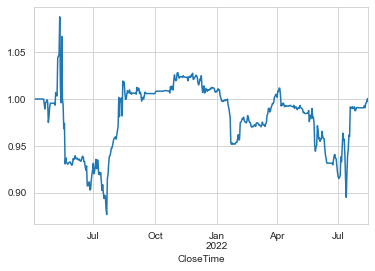

In [57]:
(1.0 + PnL(sigs.mean(axis=1), prices, cash=100.0).pct_returns).cumprod().plot()

<AxesSubplot:xlabel='CloseTime'>

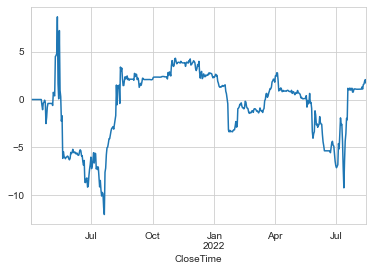

In [58]:
PnL(sigs.mean(axis=1), prices, cash=100.0).pnl.cumsum().plot()

In [59]:
expected_returns = pct.mean()
cov_matrix = pct.cov()

In [60]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df[df > 0].cumsum())
#S = CovarianceShrinkage(df).ledoit_wolf()

In [61]:
df.cumsum()

,16,32,64,128,256
CloseTime,,,,,
2021-04-03,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-04,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-05,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-06,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-08-11,2.562053,-25.201056,27.478976,7.958643,-2.807918
2022-08-12,2.562053,-25.201056,27.761717,7.958643,-2.807918
2022-08-13,3.402990,-25.201056,28.481329,7.958643,-2.807918


In [62]:
mu

16       12.360347
32       10.670185
64      331.844644
128      10.054323
256    5188.748608
dtype: float64

In [63]:
cov_matrix

,16,32,64,128,256
16,0.000112,0.000083,0.000016,0.000006,0.000002
32,0.000083,0.000155,0.000079,0.000006,0.000003
64,0.000016,0.000079,0.000165,0.000015,0.000003
128,0.000006,0.000006,0.000015,0.000016,0.000002
256,0.000002,0.000003,0.000003,0.000002,0.000002


In [64]:
ef = EfficientFrontier(mu, cov_matrix)
#w = pd.Series(ef.min_volatility())
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
w = pd.Series(ef.max_sharpe())

C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


<AxesSubplot:xlabel='CloseTime'>

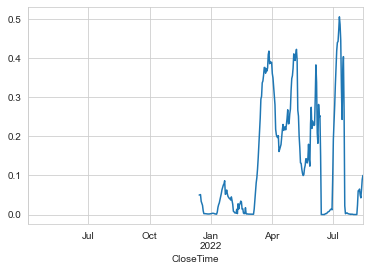

In [65]:
s = sigs.dot(w)
s.plot()

In [66]:
p = PnL(s, prices, cash=100.0)
p.pnl.std()

0.1560986172769854

<AxesSubplot:xlabel='CloseTime'>

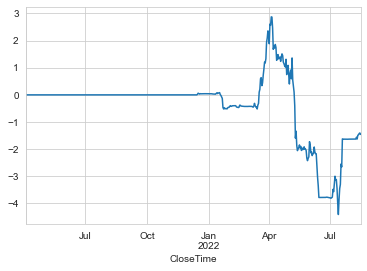

In [67]:
p.pnl.cumsum().plot()

In [68]:
pp = p.pct_returns


<AxesSubplot:ylabel='Frequency'>

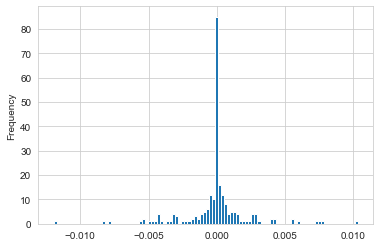

In [69]:
pp[pp != 0].plot(kind="hist", bins=100)

In [70]:
df.std()

16     1.058464
32     1.243810
64     1.285676
128    0.397745
256    0.137859
dtype: float64

In [71]:
p.sharpe


-0.35710761352362475

<AxesSubplot:xlabel='CloseTime'>

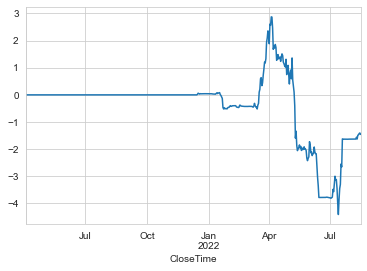

In [72]:
p.pnl.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

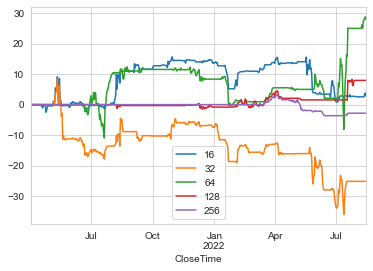

In [73]:
df.cumsum().plot()

In [74]:
df.mean() / df.std() * np.sqrt(365)

16     0.101092
32    -0.774179
64     0.831003
128    0.764558
256   -0.778263
dtype: float64

In [75]:
df.mean(axis=1).mean() / df.mean(axis=1).std() * np.sqrt(365)

0.13815929094170254

In [76]:
df.corr()

,16,32,64,128,256
16,1.000000,0.629792,0.119804,0.137172,0.112944
32,0.629792,1.000000,0.493874,0.119072,0.159856
64,0.119804,0.493874,1.000000,0.293775,0.163182
128,0.137172,0.119072,0.293775,1.000000,0.317956
256,0.112944,0.159856,0.163182,0.317956,1.000000


In [77]:
pnl.sharpe

-0.7782626532836413

<AxesSubplot:xlabel='CloseTime'>

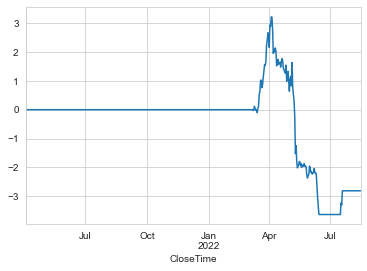

In [78]:
pnl.pnl.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

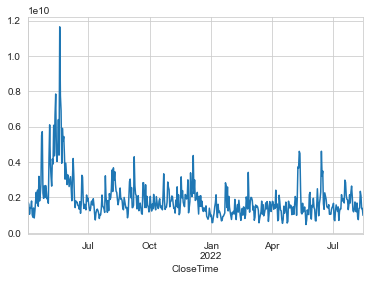

In [79]:
volumes.plot()

<AxesSubplot:xlabel='CloseTime'>

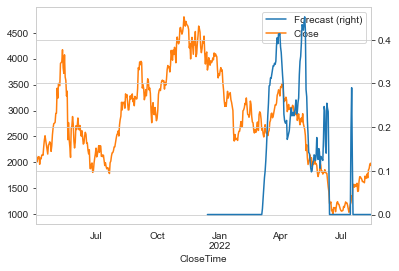

In [80]:
best.to_frame("Forecast").join(prices).plot(secondary_y="Forecast")

<AxesSubplot:xlabel='CloseTime'>

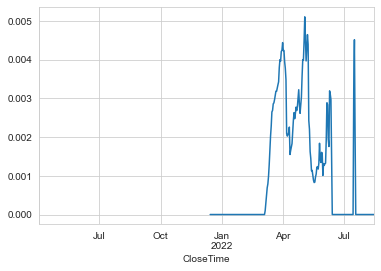

In [81]:
pnl.get_position().plot()

<AxesSubplot:xlabel='CloseTime'>

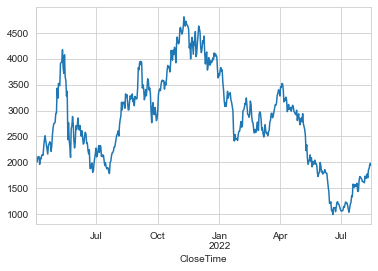

In [82]:
prices.plot()